# Implementing the Perceptron Algorithm
Implementation of the basic functions of Perceptron algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [ ]:
Plot data from data.csv
○ Implement perceptron heuristic
approach (right box in the next page)
○ Plot the initial separation line as red,
subsequent ones after each iteration
in dashed green, and the last one in
black (see page 3)
○ Play with learning rate

# Reading and Plotting the Dataset

Entire Dataset:
         x1        x2  label
0   0.78051 -0.063669      1
1   0.28774  0.291390      1
2   0.40714  0.178780      1
3   0.29230  0.421700      1
4   0.50922  0.352560      1
..      ...       ...    ...
95  0.77029  0.701400      0
96  0.73156  0.717820      0
97  0.44556  0.579910      0
98  0.85275  0.859870      0
99  0.51912  0.623590      0

[100 rows x 3 columns]


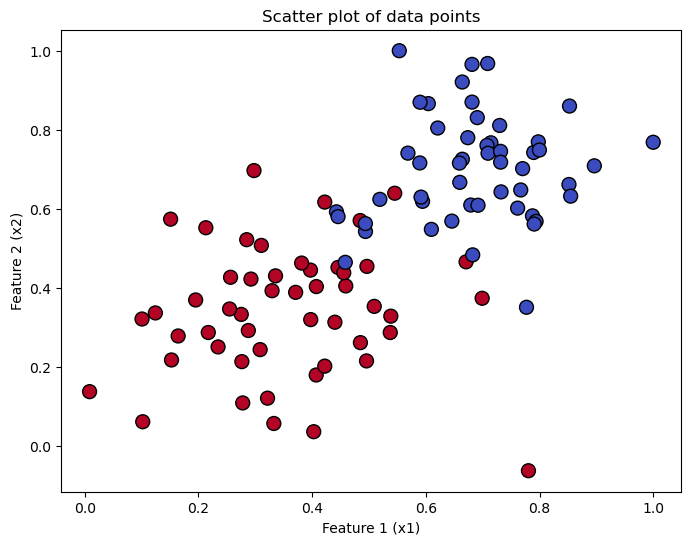

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (no header in the CSV, column names defined manually)
column_names = ['x1', 'x2', 'label']
data = pd.read_csv('data.csv', header=None, names=column_names)

# Print the entire dataset
print("Entire Dataset:")
print(data)  # Display first few rows of the dataset

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(data['x1'], data['x2'], c=data['label'], cmap='coolwarm', edgecolors='k', s=100)
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Scatter plot of data points')
plt.show()

# Perceptron Code

Learn_rate can be change from 0.01, 0.1, 1.0, or personal preference to run Algorithm. Make sure to change the variable of learn_rate.

Learning rate is: 0.1


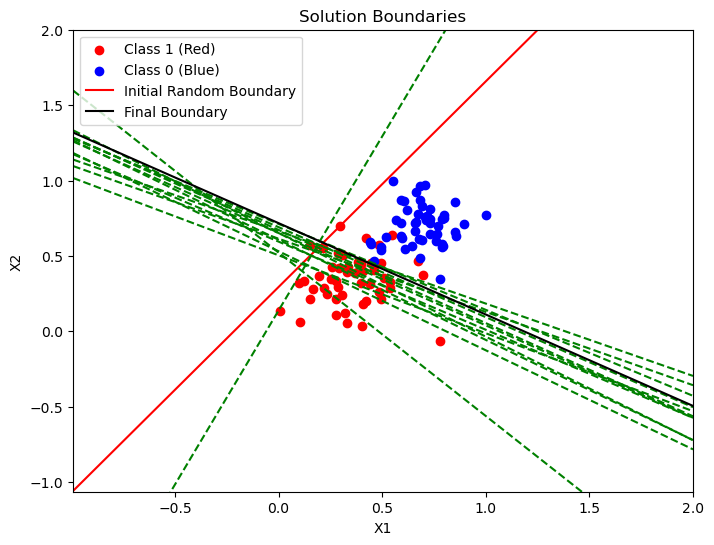

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set the random seed for reproducibility (optional)
np.random.seed(42)

# Step function for classification
def stepFunction(t):
    return 1 if t >= 0 else 0

# Prediction function
def prediction(X, W, b):
    return stepFunction(np.matmul(X, W) + b)

# Perceptron update step
def perceptronStep(X, y, W, b, learn_rate = 0.1):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i] - y_hat == 1:  # Misclassified positive class
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        elif y[i] - y_hat == -1:  # Misclassified negative class
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
    return W, b

# Perceptron training algorithm
def trainPerceptronAlgorithm(X, y, learn_rate = 0.1, num_epochs = 65):
    # Print learning rate
    print(f"Learning rate is: {learn_rate}")  # This prints the learning rate when the function is called
    
    # Randomize the initial weights and bias to random values
    W = np.random.uniform(-1, 1, (2, 1))  # Initialize weights randomly in range [-1, 1]
    b = np.random.uniform(-1, 1)  # Initialize bias randomly in range [-1, 1]
    
    boundary_lines = []  # Store boundary lines for plotting
    
    for epoch in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate)
        
        # Calculate decision boundary: w1 * x1 + w2 * x2 + b = 0 => x2 = (-w1 * x1 - b) / w2
        # Correct way to compute the boundary line slope and intercept
        slope = -W[0] / W[1]
        intercept = -b / W[1]
        boundary_lines.append((slope, intercept))  # Storing slope and intercept
    
    return boundary_lines

# Function to plot the decision boundary
def plot_decision_boundaries(X, y, boundary_lines, epoch_step=5):
    plt.figure(figsize=(8, 6))
    
    # Plot the data points: Label 1 (red), Label 0 (blue)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1 (Red)')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0 (Blue)')
    
    # Plot decision boundaries at each epoch
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Randomized initial red line (first boundary)
    slope, intercept = boundary_lines[0]
    plt.plot(xx[0], slope * xx[0] + intercept, color='red', label='Initial Random Boundary')

    # Plot boundaries from later epochs (green dashed and final black line)
    for i, (slope, intercept) in enumerate(boundary_lines[1:]):
        if i == len(boundary_lines) - 2:  # Plot final boundary in black
            plt.plot(xx[0], slope * xx[0] + intercept, color='black', label='Final Boundary')
        elif i % epoch_step == 0:  # Plot boundary every 'epoch_step' epochs
            plt.plot(xx[0], slope * xx[0] + intercept, color='green', linestyle='--')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Solution Boundaries')
    plt.legend()
    plt.show()

# Load the data from CSV (replace 'data.csv' with the path to your actual data file)
data = pd.read_csv('data.csv', header=None)

# Assuming the CSV file has columns 'x1', 'x2', and 'label' (adjust column names if necessary)
X = data[[0, 1]].values  # Features
y = data[2].values  # Labels (should be binary: 1 or 0)

# Train the perceptron algorithm with the learning rate 0.1
boundary_lines = trainPerceptronAlgorithm(X, y, learn_rate=0.1, num_epochs=65)

# Plot decision boundaries after training
plot_decision_boundaries(X, y, boundary_lines, epoch_step=5)
